In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-closed-questions-on-stack-overflow/basic_benchmark.csv
/kaggle/input/predict-closed-questions-on-stack-overflow/private leaderboard raw.7z
/kaggle/input/predict-closed-questions-on-stack-overflow/train-sample_October_9_2012_v2.csv
/kaggle/input/predict-closed-questions-on-stack-overflow/public_leaderboard.zip
/kaggle/input/predict-closed-questions-on-stack-overflow/prior_benchmark.csv
/kaggle/input/predict-closed-questions-on-stack-overflow/train.zip
/kaggle/input/predict-closed-questions-on-stack-overflow/private_leaderboard.csv
/kaggle/input/predict-closed-questions-on-stack-overflow/train-sample.zip
/kaggle/input/predict-closed-questions-on-stack-overflow/train-sample.gz
/kaggle/input/predict-closed-questions-on-stack-overflow/train_October_9_2012.csv
/kaggle/input/predict-closed-questions-on-stack-overflow/private_leaderboard.7z
/kaggle/input/predict-closed-questions-on-stack-overflow/train-sample_October_9_2012_v2.7z
/kaggle/input/predict-closed-questions-on-

In [2]:
df_train=pd.read_csv('../input/predict-closed-questions-on-stack-overflow/train-sample.csv')
df_train.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,open
1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,open
2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,open
3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,too localized
4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,open


In [3]:
df_train.shape

(140272, 15)

In [4]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df_train,test_size=0.2)
print('Training data shape: {}'.format(train_df.shape))
print('Testing data shape: {}'.format(test_df.shape))


Training data shape: (112217, 15)
Testing data shape: (28055, 15)


# Exploratory Data Analysis

## PostID

This feature is the id of the query posted by the user. This feauture does not have any importance in making the prediction but it will be used later for submission we will save it.

In [5]:
train_post_id=train_df.PostId
test_post_id=test_df.PostId

## PostCreationDate

The post creation date is the date and time on which the query was posted by the user let us see if we could make something out of this.

As we have observed that it doesn't matter on the time the question is posted on its label thus we can just remove this column both from our train and test.

In [6]:
train_df.drop(['PostCreationDate'],axis=1,inplace=True)
test_df.drop(['PostCreationDate'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
train_df.head(2)

,PostId,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
81422,7541070,879035,08/04/2011 16:26:52,1,0,zend application error requested document was ...,I have zend web application that works well in...,.htaccess,links,route,NaN,NaN,09/26/2011 06:11:58,off topic
17102,1466392,141589,07/20/2009 18:58:17,55,4,Is possible to associate a text to a JTableHea...,I want to create a JTable with a header inside...,jtable,java,NaN,NaN,NaN,NaN,open


## OwnerUserId

This is the user id who posted the query. Let us check it

In [8]:
train_df['PostCount']=[1]*len(train_df['PostId'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
pd.pivot_table(train_df,index='OwnerUserId',columns='OpenStatus',values='PostCount',aggfunc='sum')

OpenStatus,not a real question,not constructive,off topic,open,too localized
OwnerUserId,,,,,
3,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,2.0,NaN
9,NaN,NaN,NaN,1.0,NaN
13,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...
1566856,1.0,NaN,NaN,NaN,NaN
1566884,NaN,NaN,NaN,1.0,NaN
1566931,1.0,NaN,NaN,NaN,NaN


In [10]:
train_df.loc[train_df['OpenStatus']=='open','OwnerUserId'].value_counts()

325418    28
39677     27
34537     25
117700    19
19875     19
          ..
625189     1
962175     1
198133     1
215352     1
452175     1
Name: OwnerUserId, Length: 42826, dtype: int64

We see that it does not matter on the OwnerUserId whether his question is going to be open or not as there are many user whose only one question remain open 
So, we would be dropping this column

In [11]:
train_df.drop(['OwnerUserId'],axis=1,inplace=True)
test_df.drop(['OwnerUserId'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Reputation at Post Created

This can be a important factor. Let's take a look at it

In [12]:
df_train['ReputationAtPostCreation'].min()

-34

In [13]:
df_train['ReputationAtPostCreation'].max()

209631

Since the data range is such high let us scale it using MinMaxScaler

In [14]:
minimum=df_train['ReputationAtPostCreation'].min()
maximum=df_train['ReputationAtPostCreation'].max()

In [15]:
train_df['ReputationAtPostCreation']=(train_df['ReputationAtPostCreation']-minimum)/(maximum-minimum)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
test_df['ReputationAtPostCreation']=(test_df['ReputationAtPostCreation']-minimum)/(maximum-minimum)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## OwnerUndeletedAnswerCountAtPostTime 

In [17]:
train_df.OwnerUndeletedAnswerCountAtPostTime.value_counts()

0       52130
1       10541
2        6013
3        4247
4        3203
        ...  
1184        1
2016        1
609         1
673         1
735         1
Name: OwnerUndeletedAnswerCountAtPostTime, Length: 885, dtype: int64

This feature doesnot seem to be doing anything, we will be dropping it for now.

In [18]:
train_df.drop(['OwnerUndeletedAnswerCountAtPostTime'],axis=1,inplace=True)
test_df.drop(['OwnerUndeletedAnswerCountAtPostTime'],axis=1,inplace=True)

## PostClosedDate

Dropping this column as post closed date does not seem to be doing anything, so we would be dropping it 

In [19]:
train_df.drop(['PostClosedDate'],axis=1,inplace=True)
test_df.drop(['PostClosedDate'],axis=1,inplace=True)

## Tag1

In [20]:
train_df['Tag1'].isnull().sum()

9

In [21]:
test_df['Tag1'].isnull().sum()

1

We can combine all the tags column into one this would help us in comparing the words which are used as tags and the words used in Title and Body.

In [22]:
train_df['Tag1']=train_df['Tag1'].replace(np.nan,' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_df['Tag2']=train_df['Tag2'].replace(np.nan,' ')
train_df['Tag3']=train_df['Tag3'].replace(np.nan,' ')
train_df['Tag4']=train_df['Tag4'].replace(np.nan,' ')
train_df['Tag5']=train_df['Tag5'].replace(np.nan,' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
test_df['Tag1']=test_df['Tag1'].replace(np.nan,' ')
test_df['Tag2']=test_df['Tag2'].replace(np.nan,' ')
test_df['Tag3']=test_df['Tag3'].replace(np.nan,' ')
test_df['Tag4']=test_df['Tag4'].replace(np.nan,' ')
test_df['Tag5']=test_df['Tag5'].replace(np.nan,' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
train_df['Tag1']

81422                .htaccess
17102                   jtable
46719     javascript-functions
81633                    linux
65705                      php
                  ...         
92309                     java
40880               javascript
93219                      ios
115096                    java
98695                  android
Name: Tag1, Length: 112217, dtype: object

In [26]:
train_df['Tags']=train_df['Tag1']+' '+train_df['Tag2']+' '+train_df['Tag3']+' '+train_df['Tag4']+' '+train_df['Tag5']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
test_df['Tags']=test_df['Tag1']+' '+test_df['Tag2']+' '+test_df['Tag3']+' '+test_df['Tag4']+' '+test_df['Tag5']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
train_df['Tags']=train_df['Tags'].str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
test_df['Tags']=test_df['Tags'].str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
test_df['Tags']

107612                               haml sass      
115249                        c++ comparison crc    
6931                              python-3.x        
68587               performance tinymce harddisk    
93490                  algorithm data structures    
                             ...                    
55738                   php api youtube zend-gdata  
31821                java web-services jaxb cxf moxy
131817    iphone objective-c ios game-center gamekit
83969                    android sqlite listview    
44602      iphone-sdk-4.0 notifications xcode3.2    
Name: Tags, Length: 28055, dtype: object

In [31]:
train_df['Tags']=train_df['Tags'].apply(lambda x:x.lstrip())
train_df['Tags']=train_df['Tags'].apply(lambda x:x.rstrip())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
train_df['Tags']

81422                    .htaccess links route
17102                              jtable java
46719                     javascript-functions
81633     linux unix ubuntu path playframework
65705                 php codeigniter ckeditor
                          ...                 
92309                        java java-ee pojo
40880                         javascript touch
93219              ios xcode application cydia
115096           java jsf java-web-development
98695              android android-progressbar
Name: Tags, Length: 112217, dtype: object

In [33]:
test_df['Tags']=test_df['Tags'].apply(lambda x:x.lstrip())
test_df['Tags']=test_df['Tags'].apply(lambda x:x.rstrip())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
train_df.head(1)

,PostId,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,OpenStatus,PostCount,Tags
81422,7541070,08/04/2011 16:26:52,0.000167,zend application error requested document was ...,I have zend web application that works well in...,.htaccess,links,route,,,off topic,1,.htaccess links route


In [35]:
# Dropping excess columns 
train_df.drop(['PostId','OwnerCreationDate','Tag1','Tag2','Tag3','Tag4','Tag5','PostCount'],axis=1,inplace=True)
test_df.drop(['PostId','OwnerCreationDate','Tag1','Tag2','Tag3','Tag4','Tag5'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
train_df.head()

,ReputationAtPostCreation,Title,BodyMarkdown,OpenStatus,Tags
81422,0.000167,zend application error requested document was ...,I have zend web application that works well in...,off topic,.htaccess links route
17102,0.000424,Is possible to associate a text to a JTableHea...,I want to create a JTable with a header inside...,open,jtable java
46719,0.000210,Javascript: find closest number,i would like to find closest number in javascr...,not a real question,javascript-functions
81633,0.000735,change PATH permanently on Ubuntu,"I'd like to add to PATH the value "":/home/me/p...",off topic,linux unix ubuntu path playframework
65705,0.000448,CKEditor having issues with images,I've got an issue when adding images using CKE...,open,php codeigniter ckeditor


In [37]:
test_df.head()

,ReputationAtPostCreation,Title,BodyMarkdown,OpenStatus,Tags
107612,0.005728,Non Ruby dependent HAML and SASS,Forgive my ignorance about these two technolog...,not a real question,haml sass
115249,0.000215,How to two CRC in C++?,How to two CRC in C++?\r\n\r\n\r\nNeed help?,not a real question,c++ comparison crc
6931,0.000792,Help with logic within generator function,I'm trying to create a generator function:\r\n...,too localized,python-3.x
68587,0.000281,Why is deleting TinyMCE files from my disk so ...,Does anybody know why deleting tinyMCE direcor...,off topic,performance tinymce harddisk
93490,0.000167,List of where various algorithms/structures po...,Could someone please list where some of the fo...,not a real question,algorithm data structures


In [38]:
y_train=train_df['OpenStatus']
y_test=test_df['OpenStatus']

In [39]:
train_df.drop(['ReputationAtPostCreation','OpenStatus'],axis=1,inplace=True)
test_df.drop(['ReputationAtPostCreation','OpenStatus'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
y_train=y_train.map({'not a real question':0,
  'not constructive':1,
  'off topic':2,
  'open':3,
  'too localized':4})

In [41]:
y_test=y_test.map({'not a real question':0,
  'not constructive':1,
  'off topic':2,
  'open':3,
  'too localized':4})

In [42]:
train_df.head()

,Title,BodyMarkdown,Tags
81422,zend application error requested document was ...,I have zend web application that works well in...,.htaccess links route
17102,Is possible to associate a text to a JTableHea...,I want to create a JTable with a header inside...,jtable java
46719,Javascript: find closest number,i would like to find closest number in javascr...,javascript-functions
81633,change PATH permanently on Ubuntu,"I'd like to add to PATH the value "":/home/me/p...",linux unix ubuntu path playframework
65705,CKEditor having issues with images,I've got an issue when adding images using CKE...,php codeigniter ckeditor


In [43]:
test_df.head()

,Title,BodyMarkdown,Tags
107612,Non Ruby dependent HAML and SASS,Forgive my ignorance about these two technolog...,haml sass
115249,How to two CRC in C++?,How to two CRC in C++?\r\n\r\n\r\nNeed help?,c++ comparison crc
6931,Help with logic within generator function,I'm trying to create a generator function:\r\n...,python-3.x
68587,Why is deleting TinyMCE files from my disk so ...,Does anybody know why deleting tinyMCE direcor...,performance tinymce harddisk
93490,List of where various algorithms/structures po...,Could someone please list where some of the fo...,algorithm data structures


In [44]:
train_df['Text']=train_df['Title']+' '+train_df['BodyMarkdown']+' '+train_df['Tags']
test_df['Text']=test_df['Title']+' '+test_df['BodyMarkdown']+' '+test_df['Tags']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
train_df.drop(['Title','BodyMarkdown','Tags'],axis=1,inplace=True)
test_df.drop(['Title','BodyMarkdown','Tags'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [47]:
train_df.drop(['index'],inplace=True,axis=1)

In [48]:
test_df.drop(['index'],axis=1,inplace=True)

# Building the tensorflow model


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(train_df['Text'])
sequence_train=tokenizer.texts_to_sequences(train_df['Text'])
sequence_test=tokenizer.texts_to_sequences(test_df['Text'])

In [50]:
word_2_vec=tokenizer.word_index
V=len(word_2_vec)
print('Dataset has {} number of independent tokens'.format(V))

Dataset has 349490 number of independent tokens


In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(112217, 11314)

In [52]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape


(28055, 11314)

In [53]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11314)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 11314, 20)         6989820   
_________________________________________________________________
conv1d (Conv1D)              (None, 11312, 32)         1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3770, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3768, 64)          6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1256, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1254, 128)        

In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),batch_size=100,epochs=5)

Epoch 1/5
1123/1123 [==============================] - 1543s 1s/step - loss: 1.0493 - accuracy: 0.5948 - val_loss: 0.9368 - val_accuracy: 0.6452
Epoch 2/5
1123/1123 [==============================] - 1573s 1s/step - loss: 0.8782 - accuracy: 0.6700 - val_loss: 0.9088 - val_accuracy: 0.6549
Epoch 3/5
1123/1123 [==============================] - 1567s 1s/step - loss: 0.8177 - accuracy: 0.6952 - val_loss: 0.9174 - val_accuracy: 0.6549
Epoch 4/5
1123/1123 [==============================] - 1595s 1s/step - loss: 0.7660 - accuracy: 0.7144 - val_loss: 0.9312 - val_accuracy: 0.6504
Epoch 5/5
1123/1123 [==============================] - 1582s 1s/step - loss: 0.7166 - accuracy: 0.7339 - val_loss: 0.9568 - val_accuracy: 0.6440


In [55]:
model.predict(data_test)

array([[3.7106231e-02, 4.7361523e-02, 6.4215109e-02, 8.4157825e-01,
        9.7388821e-03],
       [9.4165170e-01, 3.2692698e-03, 1.5740668e-04, 5.0118409e-02,
        4.8032613e-03],
       [3.2029919e-02, 2.7048322e-03, 7.1809528e-04, 9.1338515e-01,
        5.1161949e-02],
       ...,
       [1.2304500e-01, 2.4521582e-02, 7.0951179e-02, 7.5421697e-01,
        2.7265321e-02],
       [5.8410794e-02, 1.6550344e-03, 1.1479924e-03, 8.8998520e-01,
        4.8801012e-02],
       [3.4916000e-03, 4.1427196e-04, 1.0367091e-03, 9.9058950e-01,
        4.4679949e-03]], dtype=float32)

In [56]:
y_pred=model.predict(data_test)

In [57]:
y_pred_final=np.argmax(y_pred,axis=1)
y_pred_final

array([3, 0, 3, ..., 3, 3, 3])

## Scoring

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'Y Pred')

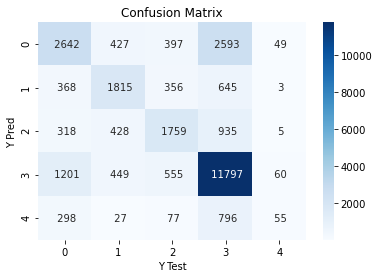

In [62]:
cm=confusion_matrix(y_test,y_pred_final)
ax=sns.heatmap(cm,cmap='Blues',annot=True,fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Y Test')
ax.set_ylabel('Y Pred')

In [64]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      6108
           1       0.58      0.57      0.57      3187
           2       0.56      0.51      0.53      3445
           3       0.70      0.84      0.77     14062
           4       0.32      0.04      0.08      1253

    accuracy                           0.64     28055
   macro avg       0.54      0.48      0.49     28055
weighted avg       0.62      0.64      0.62     28055



In [67]:
df_submission=pd.DataFrame(test_post_id,columns=['PostId'])
df_submission.head()

,PostId
107612,4500953
115249,5998568
6931,7296495
68587,6885059
93490,6259178


In [88]:
test_post_id.reset_index(drop=True)

0         4500953
1         5998568
2         7296495
3         6885059
4         6259178
           ...   
28050     7205070
28051     8980204
28052    10172658
28053     7331767
28054     6610067
Name: PostId, Length: 28055, dtype: int64

In [101]:
df_submission_1=pd.DataFrame(y_pred,columns=[0,1,2,3,4])

In [102]:
df_submission_1

,0,1,2,3,4
0,0.037106,0.047362,0.064215,0.841578,0.009739
1,0.941652,0.003269,0.000157,0.050118,0.004803
2,0.032030,0.002705,0.000718,0.913385,0.051162
3,0.005149,0.013899,0.963594,0.012675,0.004683
4,0.276515,0.183938,0.091201,0.268358,0.179989
...,...,...,...,...,...
28050,0.122772,0.025422,0.024560,0.798036,0.029210
28051,0.026806,0.002237,0.000024,0.961355,0.009578
28052,0.123045,0.024522,0.070951,0.754217,0.027265
28053,0.058411,0.001655,0.001148,0.889985,0.048801


In [103]:
df_submission_1['PostId']=list(test_post_id)

In [104]:
columns=['PostId',0,1,2,3,4]
df_submission_1=df_submission_1[columns]
df_submission_1

,PostId,0,1,2,3,4
0,4500953,0.037106,0.047362,0.064215,0.841578,0.009739
1,5998568,0.941652,0.003269,0.000157,0.050118,0.004803
2,7296495,0.032030,0.002705,0.000718,0.913385,0.051162
3,6885059,0.005149,0.013899,0.963594,0.012675,0.004683
4,6259178,0.276515,0.183938,0.091201,0.268358,0.179989
...,...,...,...,...,...,...
28050,7205070,0.122772,0.025422,0.024560,0.798036,0.029210
28051,8980204,0.026806,0.002237,0.000024,0.961355,0.009578
28052,10172658,0.123045,0.024522,0.070951,0.754217,0.027265
28053,7331767,0.058411,0.001655,0.001148,0.889985,0.048801


In [110]:
df_submission_1.columns

Index(['PostId', 0, 1, 2, 3, 4], dtype='object')

In [111]:
df_submission_1['Sum']=df_submission_1[0]+df_submission_1[1]+df_submission_1[2]+df_submission_1[3]+df_submission_1[4]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_submission_1

,PostId,0,1,2,3,4,Sum
0,4500953,0.037106,0.047362,0.064215,0.841578,0.009739,1.0
1,5998568,0.941652,0.003269,0.000157,0.050118,0.004803,1.0
2,7296495,0.032030,0.002705,0.000718,0.913385,0.051162,1.0
3,6885059,0.005149,0.013899,0.963594,0.012675,0.004683,1.0
4,6259178,0.276515,0.183938,0.091201,0.268358,0.179989,1.0
...,...,...,...,...,...,...,...
28050,7205070,0.122772,0.025422,0.024560,0.798036,0.029210,1.0
28051,8980204,0.026806,0.002237,0.000024,0.961355,0.009578,1.0
28052,10172658,0.123045,0.024522,0.070951,0.754217,0.027265,1.0
28053,7331767,0.058411,0.001655,0.001148,0.889985,0.048801,1.0
